In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading data

In [2]:
data=pd.read_csv('heart.csv')
data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Exploratory Data Analysis and Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.shape

(1025, 14)

In [11]:
#checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#checking for duplicates
data.duplicated().sum()

723

In [ ]:
#find unique values in each column
len_unique = {}
for column in data.columns:
    len_unique[column] = data[column].nunique()
print("\n Unique values in each column:", len_unique)


 Unique values in each column:      {'age': 41, 'sex': 2, 'cp': 4, 'trestbps': 49, 'chol': 152, 'fbs': 2, 'restecg': 3, 'thalach': 91, 'exang': 2, 'oldpeak': 40, 'slope': 3, 'ca': 5, 'thal': 4, 'target': 2}


In [17]:
#finding the statistics of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Target Variable Distribution

proportion of positive cases: 51.32%


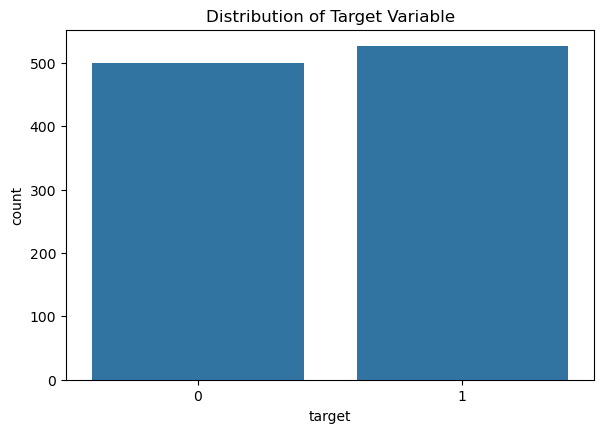

In [29]:
# Distribution of the target variable
print(f"proportion of positive cases: {len(data[data['target']==1])/len(data):.2%}")

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


### Age and Gender Analysis


Percentage of male: 69.56% | Percentage of female: 30.44%


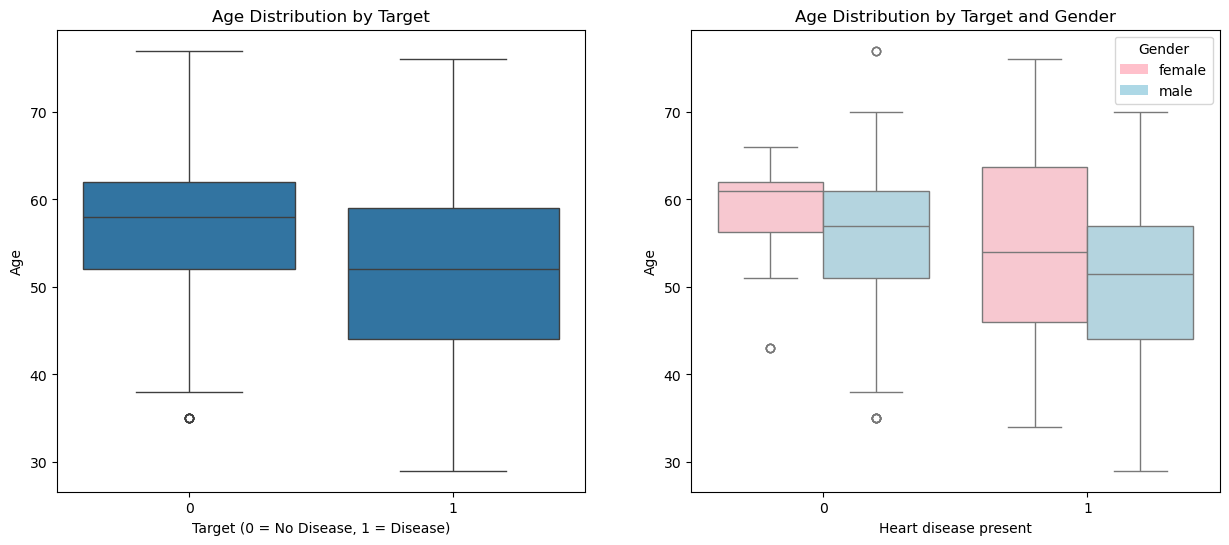

In [35]:
plt.figure(figsize=(15, 6))

# Age distribution by target
plt.subplot(1, 2, 1)        
sns.boxplot(x='target', y='age', data=data)   
plt.title('Age Distribution by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Age')

# Age distribution by target and gender
sex_counts=data['sex'].value_counts(normalize=True )*100
print("Percentage of male: {:.2f}%".format(sex_counts[1]), 
      "| Percentage of female: {:.2f}%".format(sex_counts[0]))
plt.subplot(1, 2, 2)
ax=sns.boxplot(x='target', y='age', hue='sex', data=data, palette=['pink', 'lightblue'])
plt.title('Age Distribution by Target and Gender')
plt.xlabel('Heart disease present')
plt.ylabel('Age')

# Create custom legend handles
from matplotlib.patches import Patch
legend_handles = [Patch(facecolor='pink', label='female'), Patch(facecolor='lightblue', label='male')]

#add the legend to the plot
ax.legend(handles=legend_handles, title='Gender')
plt.show()



        

### Clinical Features Analysis

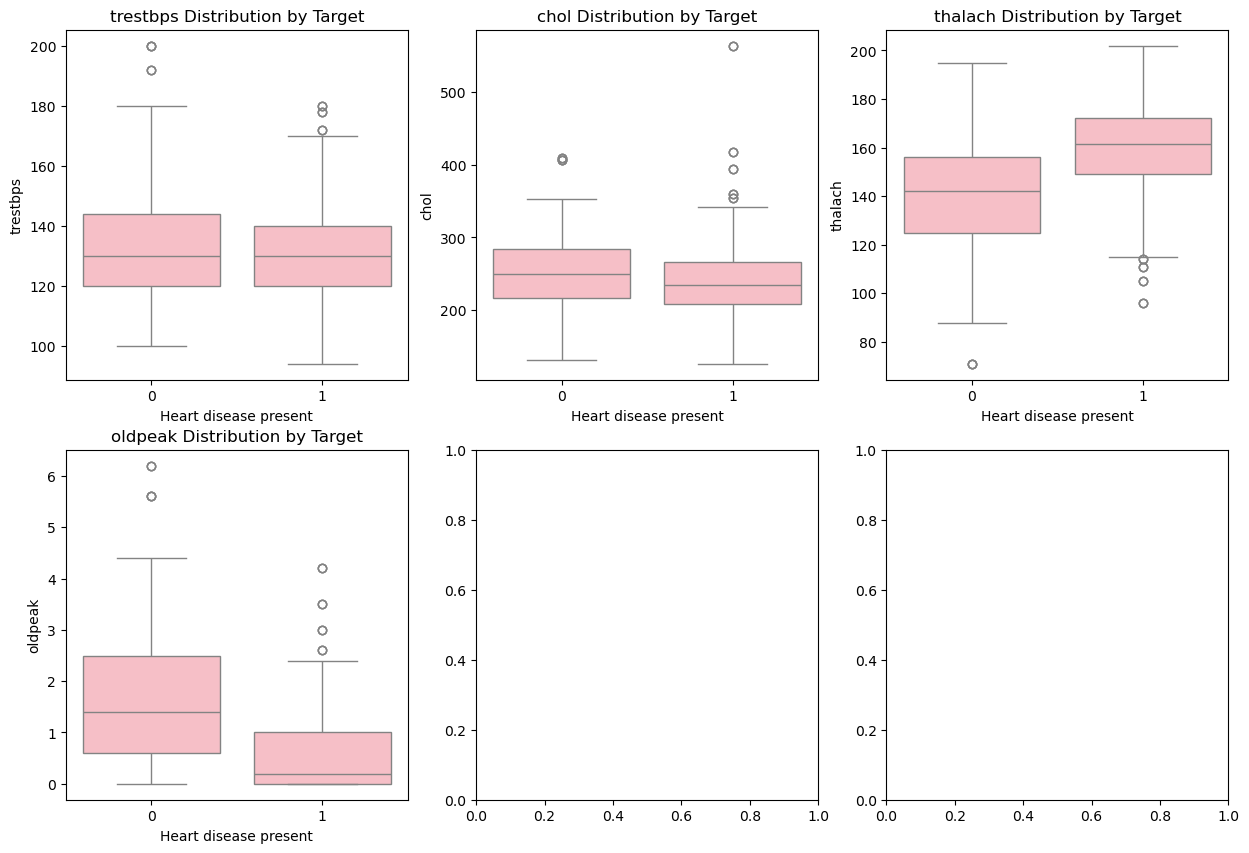

In [40]:
#Clinical Features Analysis
clinical_features = ['trestbps', 'chol','thalach', 'oldpeak', ]
fig, axes = plt.subplots(2,3,figsize=(15,10))
axes=axes.ravel()

for idx, feature in enumerate(clinical_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx], color='lightpink')
    axes[idx].set_title(f'{feature} Distribution by Target')
    axes[idx].set_xlabel('Heart disease present')
    axes[idx].set_ylabel(feature)

plt.show()